In [135]:
from netCDF4 import Dataset, Variable
import matplotlib.path as mpath
import cartopy
import xarray
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcol
import matplotlib.cm as cm
import matplotlib.ticker as mticker
import os
import nctoolkit as nct
import regex
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import matplotlib.patches as mpatches
from cartopy.util import add_cyclic_point
from matplotlib import colors
import geopandas as gpd
import shapely.geometry as shp
import shapely.ops as ops
import rioxarray
import pyproj
import pandas as pd
from matplotlib.offsetbox import AnchoredText
import matplotlib.colors as colors

In [136]:
nct.deep_clean()

In [137]:
os.chdir('/media/jasmine/Album/Project/')
print(os.getcwd())

/media/jasmine/Album/Project


In [138]:
variable = "epc100"
print(variable)
model = "CESM2-WACCM"
print(model)
experiment = "ssp585"
print(experiment)
freq = "Omon"
print(freq)

epc100
CESM2-WACCM
ssp585
Omon


In [139]:
nc = Dataset("Data/Raw/epc100_Omon_CESM2_esm-ssp585_r1i1p1f1_gn_201501-206412.nc")
unit = getattr(nc.variables[variable], "units")
unit

'mol m-2 s-1'

## Interpolation


In [140]:
for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_{}".format(variable, freq, model, experiment)):
        print(file)

print("\n")

for file in os.listdir("Data/Raw/"):
    if file.startswith("{}_{}_{}_historical".format(variable, freq, model)):
        print(file)

epc100_Omon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc
epc100_Omon_CESM2-WACCM_ssp585_r1i1p1f1_gn_210101-215012.nc
epc100_Omon_CESM2-WACCM_ssp585_r1i1p1f1_gn_215101-220012.nc
epc100_Omon_CESM2-WACCM_ssp585_r1i1p1f1_gn_220101-225012.nc
epc100_Omon_CESM2-WACCM_ssp585_r1i1p1f1_gn_225101-229912.nc


epc100_Omon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc


In [141]:
!cdo remapdis,r360x180 Data/Raw/epc100_Omon_CESM2-WACCM_ssp585_r1i1p1f1_gn_201501-210012.nc Data/{variable}_{model}_{experiment}_remapped.nc

Warning (cdfInqContents): Coordinates variable time can't be assigned!
cdo    remapdis: Distance-weighted average weights from curvilinear (320x384) to lonlat (360x180) grid, with source mask (82305)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo    remapdis: Processed 1 variable over 1032 timesteps [14.62s 574MB].


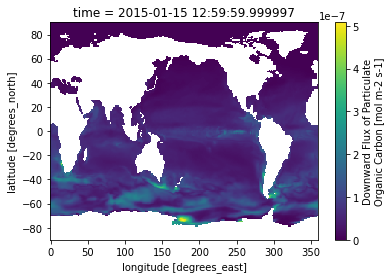

In [142]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.sel(time = "2015-01")
nc[variable].plot()

In [143]:
!cdo remapdis,r360x180 -selname,{variable} Data/Raw/epc100_Omon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc Data/{variable}_{model}_historical_remapped.nc

cdo(1) selname: Process started
Warning (cdfInqContents): Coordinates variable time can't be assigned!
cdo    remapdis: Distance-weighted average weights from curvilinear (320x384) to lonlat (360x180) grid, with source mask (82305)
cdo    remapdis:                        1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 91cdo(1) selname: Processed 1 variable over 1980 timesteps.
cdo    remapdis: Processed 243302400 values from 1 variable over 1980 timesteps [31.48s 580MB].


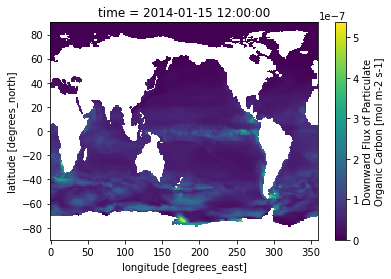

In [144]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.sel(time = "2014-01")
nc[variable].plot()

## 20 year below -40S 

#### historical

In [145]:
# Mean of historial last 20 years
historical = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
historical = historical.sel(lat = slice(-90, -40))

In [146]:
historical_cropped = historical.sel(time=slice('1995-01', '2014-12'))
#historical_cropped = historical_cropped.drop_vars("spatial_ref")
historical_cropped

<xarray.Dataset>
Dimensions:    (time: 240, bnds: 2, lon: 360, lat: 50)
Coordinates:
  * time       (time) object 1995-01-15 12:00:00 ... 2014-12-15 12:00:00
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    epc100     (time, lat, lon) float32 ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Wed Aug 10 13:50:44 2022: cdo remapdis,r360x180 -...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    table_id:               Omon
    tracking_id:            hdl:21.14100/a9bb95ac-6651-457e-ac18-33bf26d0db7b
    variable_id:            epc100
    variant_info:           CMIP6 CESM2 hindcast (1850-2014) with high-top at...
    variant_label:          r1i1p1f1
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [147]:
historical_mean = historical_cropped.mean("time")
historical_mean

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 50)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
Data variables:
    epc100   (lat, lon) float32 nan nan nan ... 6.495e-08 6.693e-08 6.921e-08

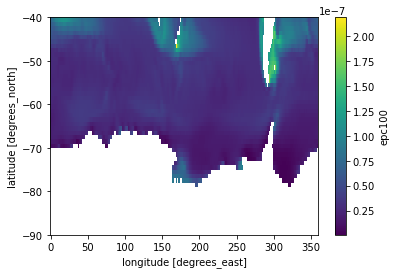

In [148]:
historical_mean[variable].plot()

In [10]:
#historical_mean.to_netcdf(path = "Data/{}_{}_historical_20yr_whole.nc".format(variable, model), mode = "w", format = "NETCDF4")

#### Season

In [80]:
historical_season = historical_cropped.resample(time='QS-DEC').mean(dim="time")

In [84]:
historical_summer = historical_season.sel(time=(historical_season.time.dt.month == 12))
historical_summer = historical_summer.sel(time = slice("1995","2014"))
historical_summer

<xarray.Dataset>
Dimensions:  (time: 20, lon: 360, lat: 50)
Coordinates:
  * time     (time) datetime64[ns] 1995-12-01 1996-12-01 ... 2014-12-01
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth    float64 100.0
Data variables:
    epc100   (time, lat, lon) float32 nan nan nan ... 9.194e-08 8.96e-08

In [85]:
historical_summer = historical_summer.mean("time")
historical_summer.to_netcdf(path = "Data/{}_{}_historical_20yr_summer_whole.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [86]:
historical_winter = historical_season.sel(time=(historical_season.time.dt.month == 6))

In [87]:
historical_winter = historical_winter.mean("time")
historical_winter.to_netcdf(path = "Data/{}_{}_historical_20yr_winter_whole.nc".format(variable, model), mode = "w", format = "NETCDF4")

#### ssp585

In [149]:
# Mean of ssp585 last 20 years
new = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
new = new.sel(lat = slice(-90, -40))

In [150]:
new_cropped = new.sel(time=slice("2081-01","2100-12"))
#new_cropped = new_cropped.drop_vars("spatial_ref")
new_cropped

<xarray.Dataset>
Dimensions:    (time: 240, bnds: 2, lon: 360, lat: 50)
Coordinates:
  * time       (time) object 2081-01-15 12:00:00 ... 2100-12-15 12:00:00
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    epc100     (time, lat, lon) float32 ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Wed Aug 10 13:50:27 2022: cdo remapdis,r360x180 D...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    table_id:               Omon
    tracking_id:            hdl:21.14100/66881b26-4b4b-4756-ba80-da9c0beaadeb
    variable_id:            epc100
    variant_info:           CMIP6 CESM2 future scenario SSP5-8.5 between 2014...
    variant_label:          r1i1p1f1
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [151]:
new_mean = new_cropped.mean("time")
new_mean

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 50)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
Data variables:
    epc100   (lat, lon) float32 nan nan nan ... 7.624e-08 7.698e-08 7.743e-08

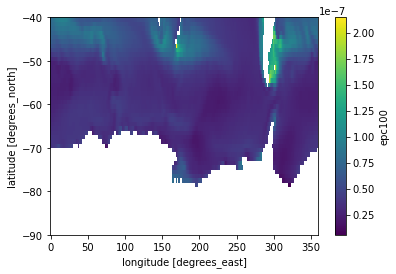

In [152]:
new_mean[variable].plot()

In [92]:
#new_mean.to_netcdf(path = "Data/{}_{}_{}_20yr_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Season

In [93]:
new_season = new_cropped.resample(time='QS-DEC').mean(dim="time")

In [94]:
new_summer = new_season.sel(time=(new_season.time.dt.month == 12))
new_summer = new_summer.sel(time = slice("2081","2100"))
new_summer

<xarray.Dataset>
Dimensions:  (time: 20, lon: 360, lat: 50)
Coordinates:
  * time     (time) datetime64[ns] 2081-12-01 2082-12-01 ... 2100-12-01
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth    float64 100.0
Data variables:
    epc100   (time, lat, lon) float32 nan nan nan ... 1.166e-07 1.139e-07

In [95]:
new_summer = new_summer.mean("time")
new_summer.to_netcdf(path = "Data/{}_{}_{}_20yr_summer_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

In [96]:
new_winter = new_season.sel(time=(new_season.time.dt.month == 6))
new_winter

<xarray.Dataset>
Dimensions:  (time: 20, lon: 360, lat: 50)
Coordinates:
  * time     (time) datetime64[ns] 2081-06-01 2082-06-01 ... 2100-06-01
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth    float64 100.0
Data variables:
    epc100   (time, lat, lon) float32 nan nan nan ... 4.937e-08 5.008e-08

In [97]:
new_winter = new_winter.mean("time")
new_winter

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 50)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth    float64 100.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan ... 4.962e-08 4.984e-08 5.013e-08

In [98]:
new_winter.to_netcdf(path = "Data/{}_{}_{}_20yr_winter_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### 20 year Difference 

In [100]:
# Calculate percentage difference
#historical = xarray.open_dataset("Data/{}_{}_historical_20yr_whole.nc".format(variable, model))
#new = xarray.open_dataset("Data/{}_{}_{}_20yr_whole.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 50)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
Data variables:
    epc100   (lat, lon) float32 nan nan nan ... 1.128e-08 1.006e-08 8.217e-09

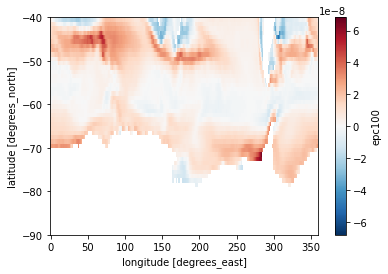

In [153]:
difference = new_mean - historical_mean
difference[variable].plot()
difference

In [154]:
difference.to_netcdf(path = "Data/{}_{}_{}_absolute_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

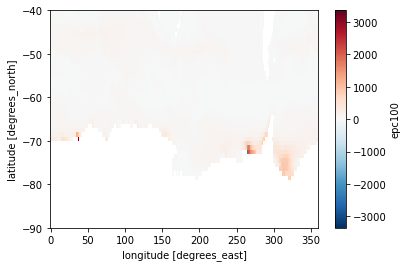

In [155]:
percentage = (difference/historical_mean)*100
percentage[variable].plot()

In [156]:
percentage.to_netcdf(path = "Data/{}_{}_{}_percentage_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Summer

In [105]:
# summer
historical_summer = xarray.open_dataset("Data/{}_{}_historical_20yr_summer_whole.nc".format(variable, model))
new_summer = xarray.open_dataset("Data/{}_{}_{}_20yr_summer_whole.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 50)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth    float64 100.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan ... 3.113e-08 2.818e-08 2.559e-08

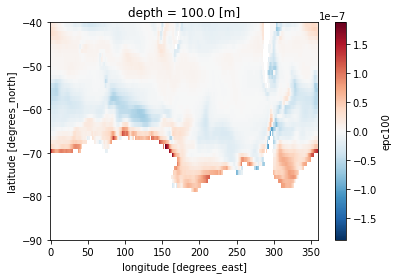

In [106]:
difference_summer = new_summer - historical_summer
difference_summer[variable].plot()
difference_summer

In [107]:
difference_summer.to_netcdf(path = "Data/{}_{}_{}_absolute_summer_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

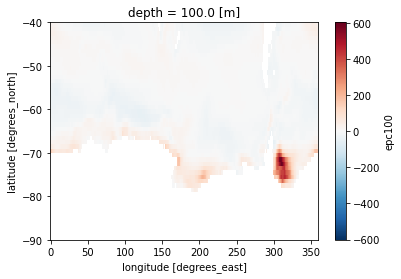

In [108]:
percentage_summer = (difference_summer/historical_summer)*100
percentage_summer[variable].plot()

In [109]:
percentage_summer.to_netcdf(path = "Data/{}_{}_{}_percentage_summer_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Winter


In [110]:
# Winter
historical_winter = xarray.open_dataset("Data/{}_{}_historical_20yr_winter_whole.nc".format(variable, model))
new_winter = xarray.open_dataset("Data/{}_{}_{}_20yr_winter_whole.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 50)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 ... -43.5 -42.5 -41.5 -40.5
    depth    float64 100.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan ... -1.153e-09 -9.402e-10 -6.159e-10

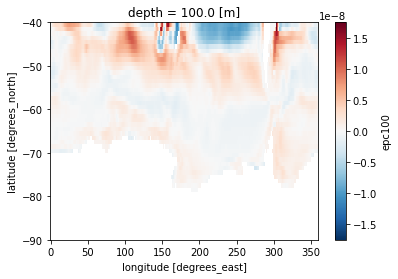

In [111]:
difference_winter = new_winter - historical_winter
difference_winter[variable].plot()
difference_winter

In [112]:
difference_winter.to_netcdf(path = "Data/{}_{}_{}_absolute_winter_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

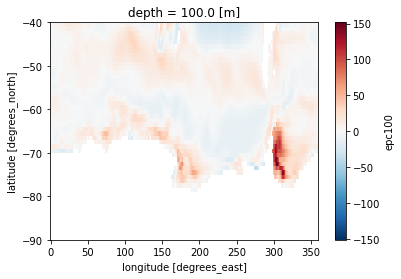

In [113]:
percentage_winter = (difference_winter/historical_winter)*100
percentage_winter[variable].plot()

In [114]:
percentage_winter.to_netcdf(path = "Data/{}_{}_{}_percentage_winter_whole.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

## Sea ice selection

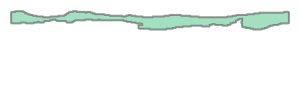

In [157]:
shape = gpd.read_file("Shapes/{}_extended_ice_margin.shp".format(model), crs = "EPSG:4326")
shape['geometry'][0]

In [158]:
ice = gpd.GeoSeries(shape['geometry'][0])

### ssp585

In [159]:
nc = xarray.open_dataset("Data/{}_{}_{}_remapped.nc".format(variable, model, experiment))
nc = nc.drop_vars("time_bnds")
nc

<xarray.Dataset>
Dimensions:  (time: 1032, lon: 360, lat: 180)
Coordinates:
  * time     (time) object 2015-01-15 12:59:59.999997 ... 2100-12-15 12:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    epc100   (time, lat, lon) float32 ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Wed Aug 10 13:50:27 2022: cdo remapdis,r360x180 D...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    table_id:               Omon
    tracking_id:            hdl:21.14100/66881b26-4b4b-4756-ba80-da9c0beaadeb
    variable_id:            epc100
    variant_info:           CMIP6 CESM2 future scenario SSP5-8.5 between 2014...
    variant_label:          r1i1p1f1
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [160]:
# Preparing nc file format for cropping
nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (time: 1032, lon: 360, lat: 180)
Coordinates:
  * time         (time) object 2015-01-15 12:59:59.999997 ... 2100-12-15 12:0...
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    spatial_ref  int64 0
Data variables:
    epc100       (time, lat, lon) float32 ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Wed Aug 10 13:50:27 2022: cdo remapdis,r360x180 D...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    table_id:               Omon
    tracking_id:            hdl:21.14100/66881b26-4b4b-4756-ba80-da9c0beaadeb
    variable_id:            epc100
    variant_info:           CMIP6 CESM2 future scenario SSP5-8.5 between 2014...
    variant_label:          r1i1p1f1
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [161]:
clipped = nc.rio.clip(ice.geometry.values, crs = 4326, drop = False, all_touched = True)

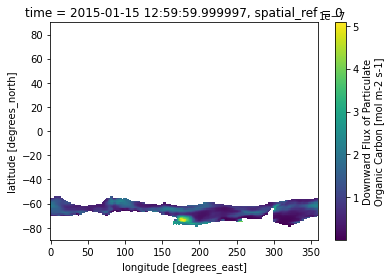

In [162]:
plot = clipped.sel(time = "2015-01")
plot[variable].plot()

In [163]:
clipped.to_netcdf(path = "Data/{}_{}_{}_cropped.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### historical


In [164]:
nc = xarray.open_dataset("Data/{}_{}_historical_remapped.nc".format(variable, model))
nc = nc.drop_vars("time_bnds")
nc

<xarray.Dataset>
Dimensions:  (time: 1980, lon: 360, lat: 180)
Coordinates:
  * time     (time) object 1850-01-15 12:59:59.999997 ... 2014-12-15 12:00:00
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    epc100   (time, lat, lon) float32 ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Wed Aug 10 13:50:44 2022: cdo remapdis,r360x180 -...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    table_id:               Omon
    tracking_id:            hdl:21.14100/a9bb95ac-6651-457e-ac18-33bf26d0db7b
    variable_id:            epc100
    variant_info:           CMIP6 CESM2 hindcast (1850-2014) with high-top at...
    variant_label:          r1i1p1f1
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [165]:
# Preparing nc file format for cropping
nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

<xarray.Dataset>
Dimensions:      (time: 1980, lon: 360, lat: 180)
Coordinates:
  * time         (time) object 1850-01-15 12:59:59.999997 ... 2014-12-15 12:0...
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
    spatial_ref  int64 0
Data variables:
    epc100       (time, lat, lon) float32 ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Wed Aug 10 13:50:44 2022: cdo remapdis,r360x180 -...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    table_id:               Omon
    tracking_id:            hdl:21.14100/a9bb95ac-6651-457e-ac18-33bf26d0db7b
    variable_id:            epc100
    variant_info:           CMIP6 CESM2 hindcast (1850-2014) with high-top at...
    variant_label:          r1i1p1f1
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [166]:
clipped = nc.rio.clip(ice.geometry.values, crs = 4326, drop = False, all_touched = True)

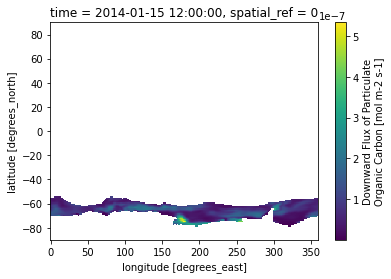

In [167]:
plot = clipped.sel(time = "2014-01")
plot[variable].plot()

In [168]:
clipped.to_netcdf(path = "Data/{}_{}_historical_cropped.nc".format(variable, model), mode = "w", format = "NETCDF4")

## 20 year of sea ice area 

### historical

In [169]:
# Mean of historial last 20 years
historical = xarray.open_dataset("Data/{}_{}_historical_cropped.nc".format(variable, model))
historical

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 1980)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) object 1850-01-15 12:59:59.999997 ... 2014-12-15 12:0...
Data variables:
    spatial_ref  int64 ...
    epc100       (time, lat, lon) float32 ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 08 22:46:46 2022: cdo remapdis,r360x180 -...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    table_id:               Omon
    tracking_id:            hdl:21.14100/a9bb95ac-6651-457e-ac18-33bf26d0db7b
    variable_id:            epc100
    variant_info:           CMIP6 CESM2 hindcast (1850-2014) with high-top at...
    variant_label:          r1i1p1f1
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [170]:
historical_cropped = historical.sel(time=slice('1995-01', '2014-12'))
historical_cropped = historical_cropped.drop_vars("spatial_ref")
historical_cropped

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) object 1995-01-15 12:00:00 ... 2014-12-15 12:00:00
Data variables:
    epc100   (time, lat, lon) float32 ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 08 22:46:46 2022: cdo remapdis,r360x180 -...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    ...                     ...
    table_id:               Omon
    tracking_id:            hdl:21.14100/a9bb95ac-6651-457e-ac18-33bf26d0db7b
    variable_id:            epc100
    variant_info:           CMIP6 CESM2 hindcast (1850-2014) with high-top at...
    variant_label:          r1i1p1f1
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [171]:
historical_mean = historical_cropped.mean("time")
historical_mean

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

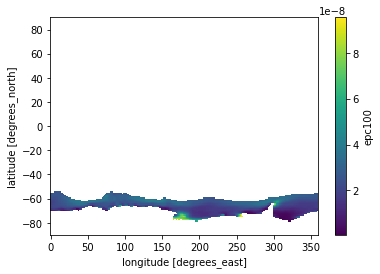

In [172]:
historical_mean[variable].plot()

In [173]:
historical_mean.to_netcdf(path = "Data/{}_{}_historical_20yr.nc".format(variable, model), mode = "w", format = "NETCDF4")

#### Season

In [174]:
historical_season = historical_cropped.resample(time='QS-DEC').mean(dim="time")

In [175]:
historical_summer = historical_season.sel(time=(historical_season.time.dt.month == 12))
historical_summer = historical_summer.sel(time = slice("1995","2014"))
historical_summer

<xarray.Dataset>
Dimensions:  (time: 20, lat: 180, lon: 360)
Coordinates:
  * time     (time) object 1995-12-01 00:00:00 ... 2014-12-01 00:00:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    epc100   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [176]:
historical_summer = historical_summer.mean("time")
historical_summer.to_netcdf(path = "Data/{}_{}_historical_20yr_summer.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [177]:
historical_winter = historical_season.sel(time=(historical_season.time.dt.month == 6))

In [178]:
historical_winter = historical_winter.mean("time")
historical_winter.to_netcdf(path = "Data/{}_{}_historical_20yr_winter.nc".format(variable, model), mode = "w", format = "NETCDF4")

### ssp585

In [179]:
# Mean of ssp585 last 20 years
new = xarray.open_dataset("Data/{}_{}_{}_cropped.nc".format(variable, model, experiment))
new

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) object 2015-01-15 12:59:59.999997 ... 2100-12-15 12:0...
Data variables:
    spatial_ref  int64 ...
    epc100       (time, lat, lon) float32 ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 08 22:47:42 2022: cdo remapdis,r360x180 D...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    table_id:               Omon
    tracking_id:            hdl:21.14100/66881b26-4b4b-4756-ba80-da9c0beaadeb
    variable_id:            epc100
    variant_info:           CMIP6 CESM2 future scenario SSP5-8.5 between 2014...
    variant_label:          r1i1p1f1
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [180]:
new_cropped = new.sel(time=slice("2081-01","2100-12"))
new_cropped = new_cropped.drop_vars("spatial_ref")
new_cropped

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 240)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) object 2081-01-15 12:00:00 ... 2100-12-15 12:00:00
Data variables:
    epc100   (time, lat, lon) float32 ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 08 22:47:42 2022: cdo remapdis,r360x180 D...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    table_id:               Omon
    tracking_id:            hdl:21.14100/66881b26-4b4b-4756-ba80-da9c0beaadeb
    variable_id:            epc100
    variant_info:           CMIP6 CESM2 future scenario SSP5-8.5 between 2014...
    variant_label:          r1i1p1f1
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [181]:
new_mean = new_cropped.mean("time")
new_mean

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

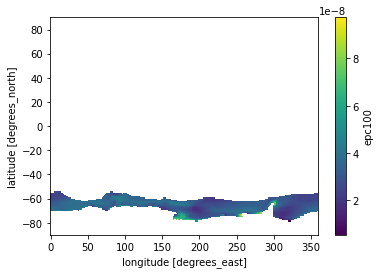

In [182]:
new_mean[variable].plot()

In [183]:
new_mean.to_netcdf(path = "Data/{}_{}_{}_20yr.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Season

In [184]:
new_season = new_cropped.resample(time='QS-DEC').mean(dim="time")

In [185]:
new_summer = new_season.sel(time=(new_season.time.dt.month == 12))
new_summer = new_summer.sel(time = slice("2081","2100"))
new_summer

<xarray.Dataset>
Dimensions:  (time: 20, lat: 180, lon: 360)
Coordinates:
  * time     (time) object 2081-12-01 00:00:00 ... 2100-12-01 00:00:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    epc100   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [186]:
new_summer = new_summer.mean("time")
new_summer.to_netcdf(path = "Data/{}_{}_{}_20yr_summer.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

In [187]:
new_winter = new_season.sel(time=(new_season.time.dt.month == 6))
new_winter

<xarray.Dataset>
Dimensions:  (time: 20, lat: 180, lon: 360)
Coordinates:
  * time     (time) object 2081-06-01 00:00:00 ... 2100-06-01 00:00:00
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    epc100   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

In [188]:
new_winter = new_winter.mean("time")
new_winter

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [189]:
new_winter.to_netcdf(path = "Data/{}_{}_{}_20yr_winter.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### 20 year Difference 

In [190]:
# Calculate percentage difference
historical = xarray.open_dataset("Data/{}_{}_historical_20yr.nc".format(variable, model))
new = xarray.open_dataset("Data/{}_{}_{}_20yr.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

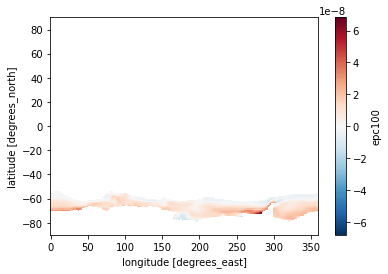

In [191]:
difference = new - historical
difference[variable].plot()
difference

In [192]:
difference.to_netcdf(path = "Data/{}_{}_{}_absolute.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

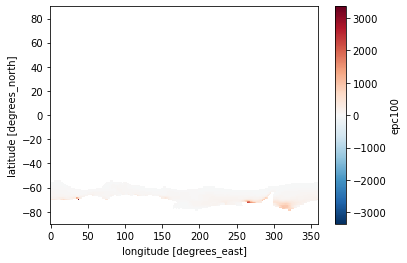

In [193]:
percentage = (difference/historical)*100
percentage[variable].plot()

In [194]:
percentage.to_netcdf(path = "Data/{}_{}_{}_percentage.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Total export difference

In [195]:
area = nct.open_data("Data/{}_{}_{}_absolute.nc".format(variable, model, experiment))
area.cell_area()
area.to_nc("Data/{}_{}_{}_absolute_area.nc".format(variable, model, experiment), overwrite=True)

In [196]:
area = xarray.open_dataset("Data/{}_{}_{}_absolute_area.nc".format(variable, model, experiment))
area

<xarray.Dataset>
Dimensions:    (lon: 360, lat: 180)
Coordinates:
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Data variables:
    epc100     (lat, lon) float32 ...
    cell_area  (lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Aug 10 13:53:55 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [197]:
area = area.assign(export=lambda x: x.epc100 * x.cell_area)
area

<xarray.Dataset>
Dimensions:    (lon: 360, lat: 180)
Coordinates:
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Data variables:
    epc100     (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    cell_area  (lat, lon) float64 1.079e+08 1.079e+08 ... 1.079e+08 1.079e+08
    export     (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Aug 10 13:53:55 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [198]:
area = area.drop_vars("epc100")
nc = area.drop_vars("cell_area")
nc

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 180)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    export   (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Aug 10 13:53:55 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [199]:
# Total export 
spatial_mean = nc.sum(["lat", "lon"])
spatial_mean

<xarray.Dataset>
Dimensions:  ()
Data variables:
    export   float64 1.651e+05

In [200]:
total_inc = spatial_mean["export"].values
total_inc

array(165119.7505229)

##### historical

In [201]:
area = nct.open_data("Data/{}_{}_historical_20yr.nc".format(variable, model))
area.cell_area()
area.to_nc("Data/{}_{}_historical_20yr_area.nc".format(variable, model), overwrite=True)

In [202]:
area = xarray.open_dataset("Data/{}_{}_historical_20yr_area.nc".format(variable, model))
area

<xarray.Dataset>
Dimensions:    (lon: 360, lat: 180)
Coordinates:
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Data variables:
    epc100     (lat, lon) float32 ...
    cell_area  (lat, lon) float64 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Aug 10 13:54:06 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [203]:
area = area.assign(export=lambda x: x.epc100 * x.cell_area)
area

<xarray.Dataset>
Dimensions:    (lon: 360, lat: 180)
Coordinates:
  * lon        (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Data variables:
    epc100     (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan
    cell_area  (lat, lon) float64 1.079e+08 1.079e+08 ... 1.079e+08 1.079e+08
    export     (lat, lon) float64 nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Aug 10 13:54:06 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [204]:
area = area.drop_vars("epc100")
nc = area.drop_vars("cell_area")
nc

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 180)
Coordinates:
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
Data variables:
    export   (lat, lon) float64 nan nan nan nan nan nan ... nan nan nan nan nan
Attributes:
    CDI:          Climate Data Interface version 1.9.8 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Wed Aug 10 13:54:06 2022: cdo -L -z zip_9 copy /tmp/nctoolk...
    CDO:          Climate Data Operators version 1.9.8 (https://mpimet.mpg.de...

In [205]:
# Total export 
spatial_mean = nc.sum(["lat", "lon"])
spatial_mean

<xarray.Dataset>
Dimensions:  ()
Data variables:
    export   float64 5.778e+05

In [206]:
historical_inc = spatial_mean["export"].values
historical_inc

array(577846.74854616)

In [207]:
percentage_inc = (total_inc/historical_inc)*100
percentage_inc

28.575007290139926

#### Summer

In [208]:
# summer
historical_summer = xarray.open_dataset("Data/{}_{}_historical_20yr_summer.nc".format(variable, model))
new_summer = xarray.open_dataset("Data/{}_{}_{}_20yr_summer.nc".format(variable, model, experiment))

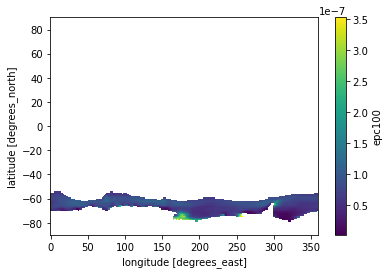

In [209]:
historical_summer[variable].plot()

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

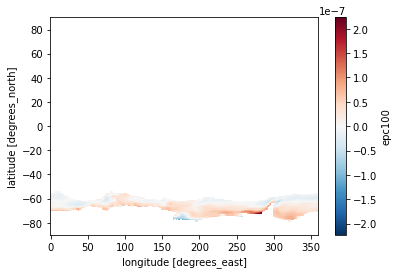

In [210]:
difference_summer = new_summer - historical_summer
difference_summer[variable].plot()
difference_summer

In [211]:
difference_summer.to_netcdf(path = "Data/{}_{}_{}_absolute_summer.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

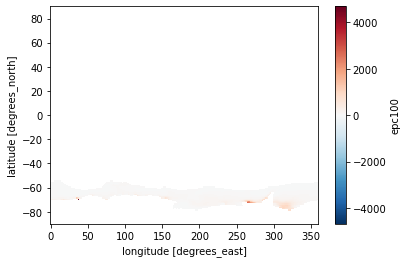

In [212]:
percentage_summer = (difference_summer/historical_summer)*100
percentage_summer[variable].plot()

In [213]:
percentage_summer.to_netcdf(path = "Data/{}_{}_{}_percentage_summer.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Winter


In [226]:
# Winter
historical_winter = xarray.open_dataset("Data/{}_{}_historical_20yr_winter.nc".format(variable, model))
new_winter = xarray.open_dataset("Data/{}_{}_{}_20yr_winter.nc".format(variable, model, experiment))

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

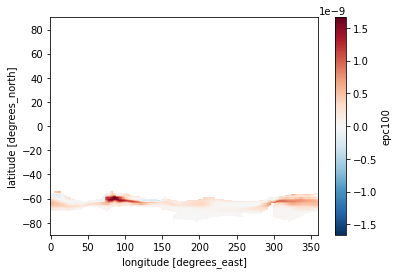

In [227]:
difference_winter = new_winter - historical_winter
difference_winter[variable].plot()
difference_winter

In [216]:
difference_winter.to_netcdf(path = "Data/{}_{}_{}_absolute_winter.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

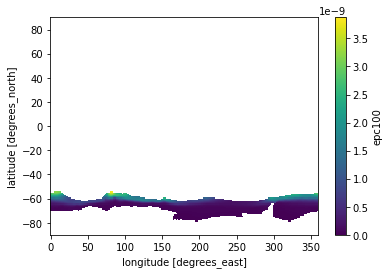

In [225]:
historical_winter
historical_winter[variable].plot()

In [117]:
sum(np.isinf(difference_winter[variable].values))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [219]:
historical_winter = historical_winter[variable].values

In [220]:
historical_winter[historical_winter == 0] = np.nan

In [221]:
historical_winter.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

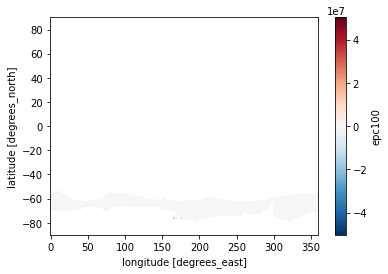

In [228]:
percentage_winter = (difference_winter/historical_winter)*100
percentage_winter[variable].plot()

In [110]:
percentage_winter

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [123]:
inf = np.isinf(percentage_winter[variable].values)

In [124]:
result = np.where(inf == True)
listOfCoordinates= list(zip(result[0], result[1]))
for cord in listOfCoordinates:
    print(cord)

(12, 165)
(12, 169)
(12, 170)
(12, 172)
(12, 173)
(12, 174)
(13, 173)
(13, 174)
(13, 175)


In [125]:
percentage_winter[variable].values[12][165]

inf

In [218]:
(percentage_winter.max())[variable].values

array(inf)

In [229]:
percentage_winter.to_netcdf(path = "Data/{}_{}_{}_percentage_winter.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

In [230]:
percentage_winter = percentage_winter[variable].values

In [231]:
percentage_winter[percentage_winter == np.inf] = np.nan

In [241]:
np.nanmin(percentage_winter)

-21.18241

### Summary values

In [232]:
mean = (percentage.mean())[variable].values
median = (percentage.median())[variable].values
max_value = (percentage.max())[variable].values
min_value = (percentage.min())[variable].values

mean_abs = (difference.mean())[variable].values
median_abs = (difference.median())[variable].values
max_value_abs = (difference.max())[variable].values
min_value_abs = (difference.min())[variable].values

print("Mean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean, mean_abs, median, median_abs,
                                                                                                          max_value, max_value_abs,
                                                                                                          min_value, min_value_abs))

Mean change = 78.1236572265625% 7.999911844080998e-09
Median change = 33.402122497558594% 8.00432076175639e-09
Max inc = 3360.11669921875% 6.82127918594233e-08
Max dec = -31.4477481842041% -1.518684911161472e-08


In [233]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "w")
summary.write("{} {}\n\nOverall:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(variable, model,
                                                                                                                           mean, mean_abs, 
                                                                                                                           median, median_abs,
                                                                                                          max_value, max_value_abs,
                                                                                                          min_value, min_value_abs))
summary.close()

In [234]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\nTotal change in export: {} mol s-1 ({}%)".format(total_inc, percentage_inc))
summary.close()

#### Season

In [235]:
mean_summer = (percentage_summer.mean())[variable].values
median_summer = (percentage_summer.median())[variable].values
max_value_summer = (percentage_summer.max())[variable].values
min_value_summer = (percentage_summer.min())[variable].values


mean_abs_summer = (difference_summer.mean())[variable].values
median_abs_summer = (difference_summer.median())[variable].values
max_value_abs_summer = (difference_summer.max())[variable].values
min_value_abs_summer = (difference_summer.min())[variable].values

In [242]:
mean_winter = np.nanmean(percentage_winter)
median_winter = np.nanmedian(percentage_winter)
max_value_winter = np.nanmax(percentage_winter)
min_value_winter = np.nanmin(percentage_winter)

mean_abs_winter = (difference_winter.mean())[variable].values
median_abs_winter = (difference_winter.median())[variable].values
max_value_abs_winter = (difference_winter.max())[variable].values
min_value_abs_winter = (difference_winter.min())[variable].values

In [245]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nSummer:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean_summer, mean_abs_summer, 
                                                                                                                    median_summer, median_abs_summer,
                                                                                                          max_value_summer, max_value_abs_summer,
                                                                                                          min_value_summer, min_value_abs_summer))
summary.close()

In [246]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nWinter:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}".format(mean_winter, mean_abs_winter, 
                                                                                                                     median_winter, median_abs_winter,
                                                                                                          max_value_winter, max_value_abs_winter,
                                                                                                          min_value_winter, min_value_abs_winter))
summary.close()

## Export region calculation

In [247]:
percentage = xarray.open_dataset("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))

#### Increasing

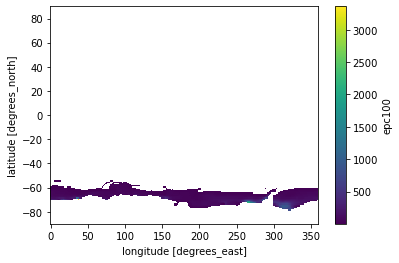

In [77]:
new = percentage.where(percentage > 0)
new[variable].plot()

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    inc      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

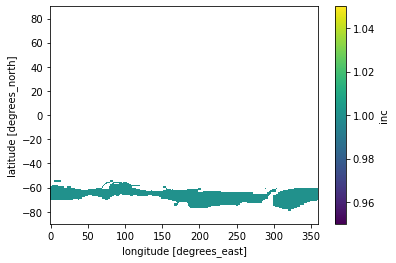

In [78]:
new1  = new.assign(inc = lambda x: getattr(x, variable) - getattr(x, variable) + 1)
new1['inc'].plot()
new1

In [79]:
new1 = new1.drop_vars(variable)
new1.to_netcdf(path = "Data/Shape/{}_{}_{}_inc.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Decreasing

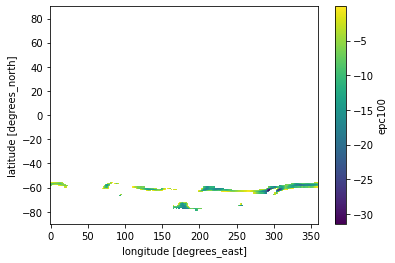

In [80]:
new2 = percentage.where(percentage < 0)
new2[variable].plot()

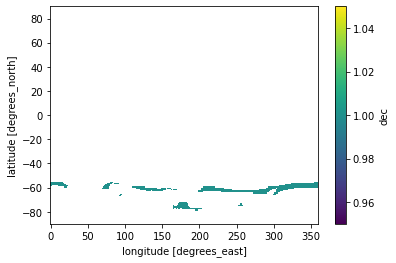

In [81]:
new3  = new2.assign(dec = lambda x: getattr(x, variable) - getattr(x, variable) + 1)
new3['dec'].plot()

In [82]:
new3

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    epc100   (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    dec      (lat, lon) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [83]:
new3 = new3.drop_vars(variable)
new3.to_netcdf(path = "Data/Shape/{}_{}_{}_dec.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

#### Summary values

In [84]:
inc_area = (new1.count()["inc"].values/percentage.count()[variable].values)*100
dec_area = (new3.count()["dec"].values/percentage.count()[variable].values)*100

# mean = (percentage.mean())[variable].values
# max_value = (percentage.max())[variable].values
# min_value = (percentage.min())[variable].values

# mean_abs = (difference.mean())[variable].values
# max_value_abs = (difference.max())[variable].values
# min_value_abs = (difference.min())[variable].values

# print("Mean change = {}% {}\n Max inc = {}% {}\n Max dec = {}% {}\n Inc area = {}\n Dec area = {}".format(mean, mean_abs, 
#                                                                                                           max_value, max_value_abs,
#                                                                                                           min_value, min_value_abs,
#                                                                                                           inc_area, dec_area))

In [85]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nInc area = {}%\nDec area = {}%".format(inc_area, dec_area))
summary.close()

### Make mask


In [6]:
shape = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
shape

,DN,geometry
0,1,"POLYGON ((4.500 -54.000, 14.500 -54.000, 14.50..."
1,1,"POLYGON ((74.500 -55.000, 79.500 -55.000, 79.5..."
2,1,"POLYGON ((71.500 -57.000, 72.500 -57.000, 72.5..."
3,1,"POLYGON ((70.500 -58.000, 71.500 -58.000, 71.5..."
4,1,"POLYGON ((151.500 -59.000, 155.500 -59.000, 15..."
5,1,"POLYGON ((287.500 -60.000, 289.500 -60.000, 28..."
6,1,"POLYGON ((326.500 -60.000, 359.500 -60.000, 35..."
7,1,"POLYGON ((79.500 -54.000, 84.500 -54.000, 84.5..."


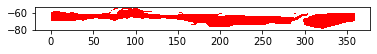

In [7]:
polygons1 = []

for i, row in shape.iterrows():
    poly = shape['geometry'][i]
    polygons1.append(poly)
    
boundary_inc = gpd.GeoSeries(ops.unary_union(polygons1))
boundary_inc.plot(color = 'red')
plt.show()

In [8]:
boundary_inc.to_file(driver = 'ESRI Shapefile', filename= "Shapes/{}_inc.shp".format(model))

In [9]:
boundary_inc.crs = {'init' :'epsg:4326'}

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


<AxesSubplot:>

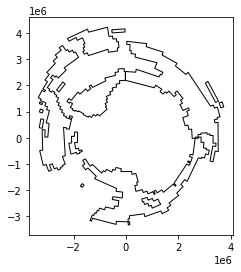

In [10]:
crs = cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90)

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
df_ae = boundary_inc.to_crs("epsg:3031")

# Here's what the plot looks like in GeoPandas
df_ae.plot(facecolor="none", edgecolor="black")

In [11]:
df_ae.to_file(driver = 'ESRI Shapefile', filename= "Shapes/{}_inc_remapped.shp".format(model))

In [9]:
shape1 = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")
shape1

,DN,geometry
0,1,"POLYGON ((85.500 -56.000, 91.500 -56.000, 91.5..."
1,1,"POLYGON ((-0.500 -55.000, 16.500 -55.000, 16.5..."
2,1,"POLYGON ((119.500 -58.000, 120.500 -58.000, 12..."
3,1,"POLYGON ((79.500 -55.000, 83.500 -55.000, 83.5..."
4,1,"POLYGON ((156.500 -60.000, 161.500 -60.000, 16..."
5,1,"POLYGON ((161.500 -61.000, 163.500 -61.000, 16..."
6,1,"POLYGON ((164.500 -61.000, 170.500 -61.000, 17..."
7,1,"POLYGON ((354.500 -55.000, 359.500 -55.000, 35..."
8,1,"POLYGON ((93.500 -65.000, 95.500 -65.000, 95.5..."
9,1,"POLYGON ((254.500 -73.000, 257.500 -73.000, 25..."


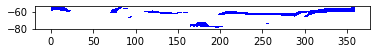

In [10]:
polygons2 = []

for i, row in shape1.iterrows():
    poly = shape1['geometry'][i]
    polygons2.append(poly)
    
boundary_dec = gpd.GeoSeries(ops.unary_union(polygons2))
boundary_dec.plot(color = 'blue')
plt.show()

In [11]:
boundary_dec.to_file(driver = 'ESRI Shapefile', filename= "Shapes/{}_dec.shp".format(model))

In [15]:
boundary_dec.crs = {'init' :'epsg:4326'}

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6


<AxesSubplot:>

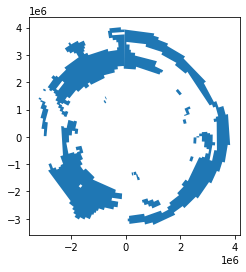

In [16]:
crs = cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90)

# This can be converted into a `proj4` string/dict compatible with GeoPandas
crs_proj4 = crs.proj4_init
df_ae = boundary_dec.to_crs(crs_proj4)

# Here's what the plot looks like in GeoPandas
df_ae.plot()

In [17]:
df_ae.to_file(driver = 'ESRI Shapefile', filename= "Shapes/{}_dec_remapped.shp".format(model))

#### Plot of masks

In [12]:
inc = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
dec = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")

/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:385: ShapelyDeprecationWarning: Iteratio

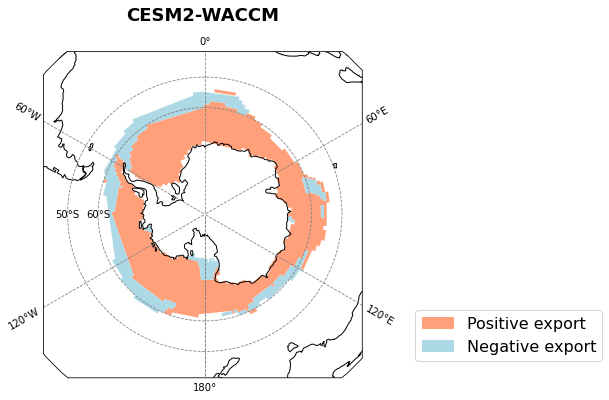

In [13]:
fig = plt.figure(figsize=[8,6])

ax = fig.add_subplot(1,1,1,
                     projection = cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))


plt.title("{}".format(model),
         fontsize = 18, fontweight="bold",
          pad = 16, loc = "center")

ax.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())


gl = ax.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = '--',
                  y_inline = True) 

gl.ylabel_style = {'size': 10}
gl.xlabel_style = {'size': 10}

gl.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])
            
            
ax.add_geometries(inc['geometry'], 
                  cartopy.crs.PlateCarree(),
                  facecolor = 'lightsalmon', 
                  edgecolor = 'none',
                  linestyle = ':')

ax.add_geometries(dec['geometry'], 
                  cartopy.crs.PlateCarree(),
                  facecolor = 'lightblue', 
                  edgecolor = 'none',
                  linestyle = ':')

ax.coastlines() 

# ### Drawing a border box around the plot
# autoAxis = ax.axis()
# #print(autoAxis[0])
# # plt.Rectangle((left corner x value, left corner y value), extension in in the x axis direction, extension in the y axis direction)
# rec = plt.Rectangle((autoAxis[0]-1000000,autoAxis[2]-1000000),(autoAxis[1]-autoAxis[0])+2000000,(autoAxis[3]-autoAxis[2])+2000000,fill=False,lw=1)
# rec = ax.add_patch(rec)
# rec.set_clip_on(False)


inc_label = mpatches.Rectangle((0, 0), 1, 1, facecolor="lightsalmon")
dec_label = mpatches.Rectangle((0, 0), 1, 1, facecolor="lightblue")
labels = ['Positive export',
          'Negative export']

# bbox_to_anchor = (x position/distance from left edge, y position/distance from base)
fig.legend([inc_label, dec_label], labels,
            bbox_to_anchor=(1.22, 0.3),
           fancybox=True, prop={'size': 16})


# bbox_inches = "tight" will make sure the legend box are not cropped out when saving the image 
plt.savefig("output/{}/{}_mask_regions.png".format(model, model), bbox_inches='tight')

plt.show()

## Zonal separation

In [6]:
inc = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
dec = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")

##### Increasing

In [22]:
nc = xarray.open_dataset("Data/{}_{}_{}_cropped.nc".format(variable, model, experiment))

nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

inc_area = nc.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
inc_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
    depth        float64 ...
    spatial_ref  int64 0
Data variables:
    epc100       (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Thu Aug 04 16:34:12 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /ccc/work/cont003/gencmip6/oboucher/IGCM_OUT/IPSL...
    ...                     ...
    variant_label:          r1i1p1f1
    EXPID:                  ssp585
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          c2dce418e78ca835be1e2ff817c2c403
    model_version:          6.1.8
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

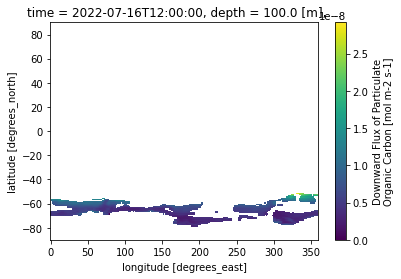

In [23]:
plotting = inc_area.sel(time = "2022-07")
plotting[variable].plot()

In [24]:
vars_list = list(inc_area.data_vars)  
for var in vars_list:  
    del inc_area[var].attrs['grid_mapping']


inc_area.to_netcdf(path = "Data/{}_{}_{}_inc.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

##### Decreasing

In [25]:
dec_area = nc.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
dec_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * time         (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:...
    depth        float64 ...
    spatial_ref  int64 0
Data variables:
    epc100       (time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Thu Aug 04 16:34:12 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /ccc/work/cont003/gencmip6/oboucher/IGCM_OUT/IPSL...
    ...                     ...
    variant_label:          r1i1p1f1
    EXPID:                  ssp585
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          c2dce418e78ca835be1e2ff817c2c403
    model_version:          6.1.8
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

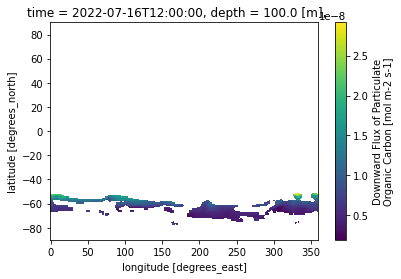

In [26]:
plotting = dec_area.sel(time = "2022-07")
plotting[variable].plot()

In [27]:
vars_list = list(dec_area.data_vars)  
for var in vars_list:  
    del dec_area[var].attrs['grid_mapping']


dec_area.to_netcdf(path = "Data/{}_{}_{}_dec.nc".format(variable, model, experiment), mode = "w", format = "NETCDF4")

### Zonal Absolute/Percentage Change

In [248]:
inc = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
dec = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")

#### Increasing

In [249]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))

nc.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
nc.rio.write_crs("epsg:4326", inplace=True)

inc_area = nc.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
inc_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    epc100       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

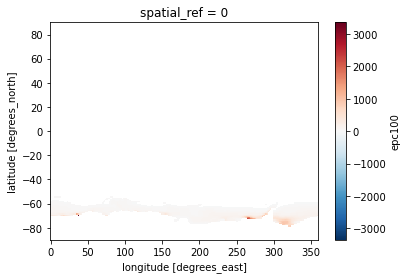

In [250]:
inc_area[variable].plot()

In [251]:
inc_area.to_netcdf(path = "Data/{}_{}_percentage_inc.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [252]:
ab = xarray.open_dataset("Data/{}_{}_{}_absolute.nc".format(variable, model, experiment))

ab.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
ab.rio.write_crs("epsg:4326", inplace=True)

ab_inc_area = ab.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)
ab_inc_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    epc100       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

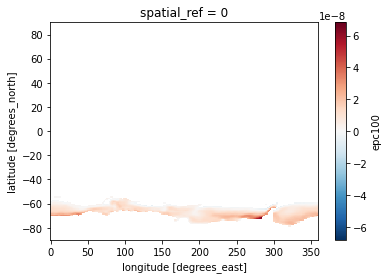

In [253]:
ab_inc_area[variable].plot()

In [254]:
ab_inc_area.to_netcdf(path = "Data/{}_{}_absolute_inc.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [255]:
inc_mean = (inc_area.mean())[variable].values
inc_median = (inc_area.median())[variable].values
inc_max_value = (inc_area.max())[variable].values
inc_min_value = (inc_area.min())[variable].values

inc_mean_abs = (ab_inc_area.mean())[variable].values
inc_median_abs = (ab_inc_area.median())[variable].values
inc_max_value_abs = (ab_inc_area.max())[variable].values
inc_min_value_abs = (ab_inc_area.min())[variable].values

print("Mean change = {}% {}\n Max inc = {}% {}\n Max dec = {}% {}\n".format(inc_mean, inc_mean_abs, 
                                                                            inc_max_value, inc_max_value_abs,
                                                                            inc_min_value, inc_min_value_abs))

Mean change = 93.24714660644531% 1.0094051816622596e-08
 Max inc = 3360.11669921875% 6.82127918594233e-08
 Max dec = -26.349281311035156% -1.0223574875567465e-08



In [256]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nIncreasing zone:\nMean change = {}% {}\nMedian change = {}% {}\nMax inc = {}% {}\nMax dec = {}% {}\n".format(inc_mean, inc_mean_abs, 
                                                                                                                                  inc_median, inc_median_abs,
                                                                            inc_max_value, inc_max_value_abs,
                                                                            inc_min_value, inc_min_value_abs))
summary.close()

##### Decreasing

In [257]:
dec_area = nc.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
dec_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    epc100       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

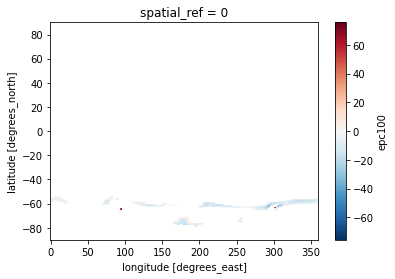

In [258]:
dec_area[variable].plot()

In [259]:
dec_area.to_netcdf(path = "Data/{}_{}_percentage_dec.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [260]:
ab_dec_area = ab.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)
ab_dec_area

<xarray.Dataset>
Dimensions:      (lat: 180, lon: 360)
Coordinates:
  * lat          (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon          (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
    spatial_ref  int64 0
Data variables:
    epc100       (lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

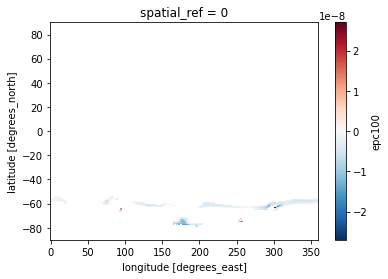

In [261]:
ab_dec_area[variable].plot()

In [262]:
ab_dec_area.to_netcdf(path = "Data/{}_{}_absolute_dec.nc".format(variable, model), mode = "w", format = "NETCDF4")

In [263]:
dec_mean = (dec_area.mean())[variable].values
dec_median = (dec_area.median())[variable].values
dec_max_value = (dec_area.max())[variable].values
dec_min_value = (dec_area.min())[variable].values

dec_mean_abs = (ab_dec_area.mean())[variable].values
dec_median_abs = (ab_dec_area.median())[variable].values
dec_max_value_abs = (ab_dec_area.max())[variable].values
dec_min_value_abs = (ab_dec_area.min())[variable].values

print("Mean change = {}% {}\n Max inc = {}% {}\n Max dec = {}% {}\n".format(dec_mean, dec_mean_abs, 
                                                                            dec_max_value, dec_max_value_abs,
                                                                            dec_min_value, dec_min_value_abs))

Mean change = -7.20542573928833% -2.803532961337396e-09
 Max inc = 75.64967346191406% 2.6995795820994317e-08
 Max dec = -31.4477481842041% -1.518684911161472e-08



In [264]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\nDecreasing zone:\nMean change = {}% {}\nMedian change = {} {}%\nMax inc = {}% {}\nMax dec = {}% {}\n".format(dec_mean, dec_mean_abs, 
                                                                                                                                dec_median, dec_median_abs,
                                                                            dec_max_value, dec_max_value_abs,
                                                                            dec_min_value, dec_min_value_abs))
summary.close()

## Absolute map

##### Mapping

In [50]:
inc = gpd.read_file("Shapes/{}_inc_remapped_improved.shp".format(model))
dec = gpd.read_file("Shapes/{}_dec_remapped_improved.shp".format(model))

DriverError: Shapes/IPSL-CM6A-LR_inc_remapped_improved.shp: No such file or directory

In [31]:
# Finding max/min value between the two years
old = xarray.open_dataset("Data/{}_{}_historical_20yr.nc".format(variable, model))
new = xarray.open_dataset("Data/{}_{}_{}_20yr.nc".format(variable, model, experiment))

In [32]:
lat_old = old['lat'].values 
lon_old = old['lon'].values
var_old = old[variable].values

#var_old = np.nanmean(var_old, axis = 0) 

old_max = np.nanmax(var_old)
old_min = np.nanmin(var_old)
print(old_max, old_min)


var_old, lon_old = add_cyclic_point(var_old, coord=lon_old)
x, y = np.meshgrid(lon_old, lat_old)

9.542126e-08 6.2140665e-10


In [33]:
lat_new = new['lat'].values 
lon_new = new['lon'].values
var_new = new[variable].values

#var_new = np.nanmean(var_new, axis = 0) 

new_max = np.nanmax(var_new)
new_min = np.nanmin(var_new)
print(new_max, new_min)


var_new, lon_new = add_cyclic_point(var_new, coord=lon_new)
x_new, y_new = np.meshgrid(lon_new, lat_new)

9.734799e-08 5.4236184e-09


In [34]:
overall_max = max(old_max, new_max)
overall_min = min(old_min, new_min)
print(overall_max, overall_min)

9.734799e-08 6.2140665e-10


/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:280: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:347: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
/home/jasmine/anaconda3/envs/newenv2/lib/python3.9/site-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ 

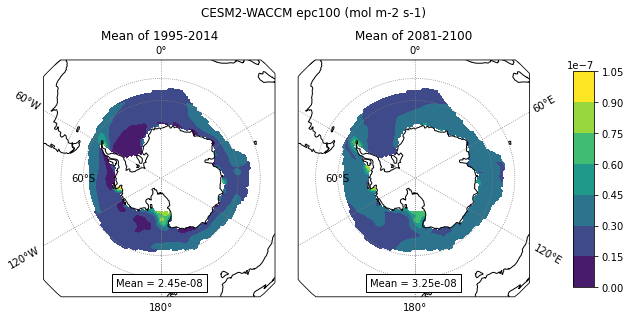

In [35]:
fig = plt.figure(figsize=[10, 5])
ax1 = fig.add_subplot(1, 2, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))
ax2 = fig.add_subplot(1, 2, 2, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
                               sharex=ax1, sharey=ax1)
fig.subplots_adjust(wspace=0.1)

plt.suptitle("{} {} ({})".format(model, variable, unit))


# 2014 plot
ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl1.right_labels = False

gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



ax1.title.set_text('Mean of 1995-2014')

p = ax1.contourf(x, y, var_old,
                vmax = overall_max, vmin = overall_min,
                cmap = 'viridis',
                transform = cartopy.crs.PlateCarree())

ax1.coastlines()

# ax1.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax1.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')


mean2014 = AnchoredText("Mean = {0:.2e}".format(old.mean()[variable].values), loc="lower center")
ax1.add_artist(mean2014)


# 2100 plot
ax2.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl2 = ax2.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 

gl2.left_labels = False

gl2.ylabel_style = {'size': 10}
gl2.xlabel_style = {'size': 10}

gl2.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl2.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])

ax2.title.set_text('Mean of 2081-2100')

p2 = ax2.contourf(x_new, y_new, var_new,
                vmax = overall_max, vmin = overall_min,
                cmap = 'viridis',
                transform = cartopy.crs.PlateCarree())

ax2.coastlines()

# ax2.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax2.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')

mean2100 = AnchoredText("Mean = {0:.2e}".format(new.mean()[variable].values), loc="lower center")
ax2.add_artist(mean2100)



### Colorbar
fig.subplots_adjust(right=0.8) # Move all subplots 0.2 away from the right
cbar_ax = fig.add_axes([0.86, 0.2, 0.03, 0.6]) # Define position and size of new element (distance from left, distance from bottom, width, height)
fig.colorbar(p, cax=cbar_ax)


plt.savefig("output/{}/{}_{}_2014vs2100.png".format(model, variable, model))

plt.show()

## Percentage Change map

In [36]:
nc = xarray.open_dataset("Data/{}_{}_{}_percentage.nc".format(variable, model, experiment))
nc

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    epc100   (lat, lon) float32 ...

In [37]:
lat = nc['lat'].values 
lon = nc['lon'].values
var = nc[variable].values

var_max = np.nanmax(var)
var_min = np.nanmin(var)

var_upper = np.nanquantile(var[var>0], 0.9)
var_lower = np.nanquantile(var[var<0], 0.1)
label = abs(max([var_upper, var_lower], key = abs))
print(var_upper, var_lower)
print(var_max, var_min)

var, lon = add_cyclic_point(var, coord=lon)
x, y = np.meshgrid(lon, lat)

211.7726867675782 -16.55816230773926
3360.1167 -31.447748


In [58]:
inc = gpd.read_file("Shapes/{}_inc_remapped_improved.shp".format(model))
dec = gpd.read_file("Shapes/{}_dec_remapped_improved.shp".format(model))

DriverError: Shapes/IPSL-CM6A-LR_inc_remapped_improved.shp: No such file or directory

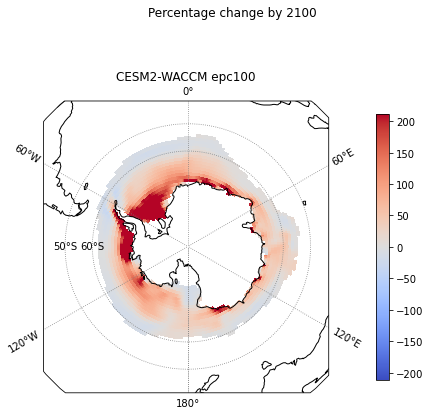

In [38]:
fig = plt.figure(figsize=[7, 7])
ax1 = fig.add_subplot(1, 1, 1, projection=cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90))


plt.suptitle("Percentage change by 2100")


ax1.set_extent([-180, 180, -90, -40], cartopy.crs.PlateCarree())

gl1 = ax1.gridlines(crs = cartopy.crs.PlateCarree(),
                  draw_labels = True,
                  color = 'grey',
                  linestyle = ':',
                  y_inline = True,
                  x_inline = False) 


gl1.ylabel_style = {'size': 10}
gl1.xlabel_style = {'size': 10}

gl1.ylocator = mticker.FixedLocator([-60, -50])

plt.draw()
for ea in gl1.label_artists:
    if ea[0]== 'lat':
        tx = ea[2]
        xy = tx.get_position()
        if xy[0]!=-90:
            tx.set_position([-90, xy[1]])



ax1.title.set_text("{} {}".format(model, variable))

divnorm = colors.TwoSlopeNorm(vmin = -label, vcenter = 0., vmax = label)
#divnorm = colors.TwoSlopeNorm(vmin = var_min, vcenter = 0., vmax = var_max)

p = ax1.pcolor(x, y, var, 
              cmap = 'coolwarm', norm = divnorm, transform = cartopy.crs.PlateCarree() )


ax1.coastlines()

# ax1.add_geometries(inc['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'red',
#                   linestyle = ':')

# ax1.add_geometries(dec['geometry'], 
#                   cartopy.crs.Orthographic(central_longitude = 0, central_latitude=-90),
#                   facecolor = 'none', 
#                   edgecolor = 'blue',
#                   linestyle = ':')

cb = plt.colorbar(p, shrink=0.7, pad = 0.12)

plt.savefig("output/{}/{}_{}_percentage_change.png".format(model, variable, model))

plt.show()

## Zonal Mean Summary 

### Increasing

In [69]:
inc = gpd.read_file("Shapes/{}_inc.shp".format(model), crs = "EPSG:4326")
dec = gpd.read_file("Shapes/{}_dec.shp".format(model), crs = "EPSG:4326")

In [70]:
new = xarray.open_dataset("Data/{}_{}_{}_20yr.nc".format(variable, model, experiment))
new_mean = np.nanmean(new[variable].values)
new_max = np.nanmax(new[variable].values)
new_min = np.nanmin(new[variable].values)
print(new_mean)     

4.936164e-08


In [71]:
new.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
new.rio.write_crs("epsg:4326", inplace=True)

new_inc = new.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)

In [72]:
new_inc_mean = np.nanmean(new_inc[variable].values)
new_inc_max = np.nanmax(new_inc[variable].values)
new_inc_min = np.nanmin(new_inc[variable].values)

print(new_inc_mean, new_inc_max, new_inc_min)

5.0339352e-08 1.9207684e-07 0.0


In [73]:
historical = xarray.open_dataset("Data/{}_{}_historical_20yr.nc".format(variable, model))
historical_mean = np.nanmean(historical[variable].values)
historical_max = np.nanmax(historical[variable].values)
historical_min = np.nanmin(historical[variable].values)
print(historical_mean)     

4.7554288e-08


In [74]:
historical.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
historical.rio.write_crs("epsg:4326", inplace=True)

historical_inc = historical.rio.clip(inc.geometry.values, crs = 4326, drop = False, all_touched = True)

In [75]:
historical_inc_mean = np.nanmean(historical_inc[variable].values)
historical_inc_max = np.nanmax(historical_inc[variable].values)
historical_inc_min = np.nanmin(historical_inc[variable].values)

print(historical_inc_mean, historical_inc_max, historical_inc_min)

4.4624727e-08 1.9022869e-07 0.0


### Decreasing

In [76]:
new.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
new.rio.write_crs("epsg:4326", inplace=True)

new_dec = new.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)

In [77]:
new_dec_mean = np.nanmean(new_dec[variable].values)
new_dec_max = np.nanmax(new_dec[variable].values)
new_dec_min = np.nanmin(new_dec[variable].values)

print(new_dec_mean, new_dec_max, new_dec_min)

4.8772446e-08 1.9207684e-07 2.599338e-08


In [78]:
historical.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)
historical.rio.write_crs("epsg:4326", inplace=True)

historical_dec = historical.rio.clip(dec.geometry.values, crs = 4326, drop = False, all_touched = True)

In [79]:
historical_dec_mean = np.nanmean(historical_dec[variable].values)
historical_dec_max = np.nanmax(historical_dec[variable].values)
historical_dec_min = np.nanmin(historical_dec[variable].values)

print(historical_dec_mean, historical_dec_max, historical_dec_min)

5.2111027e-08 1.9022869e-07 2.6142713e-08


In [80]:
summary = open("output/{}/{}_summary.txt".format(model, variable), "a")
summary.write("\n\n\nOverall:\nNew mean = {}m\nNew max = {}m\nNew min = {}m".format(new_mean, new_max, new_min))
summary.write("\n\nHistorical mean = {}m\nHistorical max = {}m\nHistorical min = {}m".format(historical_mean, historical_max, historical_min))

summary.write("\n\n\nIncreasing zone:\nNew mean = {}m\nNew max = {}m\nNew min = {}m".format(new_inc_mean, new_inc_max, new_inc_min))
summary.write("\n\nHistorical mean = {}m\nHistorical max = {}m\nHistorical min = {}m".format(historical_inc_mean, historical_inc_max, historical_inc_min))

summary.write("\n\n\nDecreasing zone:\nNew mean = {}m\nNew max = {}m\nNew min = {}m".format(new_dec_mean, new_dec_max, new_dec_min))
summary.write("\n\nHistorical mean = {}m\nHistorical max = {}m\nHistorical min = {}m".format(historical_dec_mean, historical_dec_max, historical_dec_min))
summary.close()

## Mean regression 

### Total


In [265]:
# Change in annual mean value 
nc = xarray.open_dataset("Data/{}_{}_{}_cropped.nc".format(variable, model, experiment))
nc = nc.drop_vars("spatial_ref")
nc

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) object 2015-01-15 12:59:59.999997 ... 2100-12-15 12:00:00
Data variables:
    epc100   (time, lat, lon) float32 ...
Attributes: (12/44)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Mon Aug 08 22:47:42 2022: cdo remapdis,r360x180 D...
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    institution:            National Center for Atmospheric Research
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            ScenarioMIP
    ...                     ...
    table_id:               Omon
    tracking_id:            hdl:21.14100/66881b26-4b4b-4756-ba80-da9c0beaadeb
    variable_id:            epc100
    variant_info:           CMIP6 CESM2 future scenario SSP5-8.5 between 2014...
    variant_label:          r1i1p1f1
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [266]:
spatial_mean = nc.groupby("time").mean(["lat", "lon"])
spatial_mean

<xarray.Dataset>
Dimensions:  (time: 1032)
Coordinates:
  * time     (time) object 2015-01-15 12:59:59.999997 ... 2100-12-15 12:00:00
Data variables:
    epc100   (time) float32 9.884e-08 5.343e-08 ... 6.332e-08 1.363e-07

In [267]:
year_mean = spatial_mean.groupby("time.year").mean("time")
year_mean

<xarray.Dataset>
Dimensions:  (year: 86)
Coordinates:
  * year     (year) int64 2015 2016 2017 2018 2019 ... 2096 2097 2098 2099 2100
Data variables:
    epc100   (year) float32 2.55e-08 2.794e-08 2.615e-08 ... 3.22e-08 3.406e-08

In [268]:
var_mean = year_mean[variable].values

In [269]:
time = year_mean['year'].values
time

array([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025,
       2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036,
       2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047,
       2048, 2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058,
       2059, 2060, 2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069,
       2070, 2071, 2072, 2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080,
       2081, 2082, 2083, 2084, 2085, 2086, 2087, 2088, 2089, 2090, 2091,
       2092, 2093, 2094, 2095, 2096, 2097, 2098, 2099, 2100])

In [270]:
yearly_summer = []
yearly_winter = []

In [271]:
for i in time:
    year = spatial_mean.sel(time = "{}".format(i))
    
    season_mean = year.groupby("time.season").mean("time")

    summer = season_mean.sel(season = "DJF")[variable].values
    summer = summer.tolist()
    winter = season_mean.sel(season = "JJA")[variable].values
    winter = winter.tolist()
    
    yearly_summer.append(summer)
    yearly_winter.append(winter)
    

In [272]:
data = {'Year': time,
        'Annual': var_mean,
        'Summer': yearly_summer,
        'Winter': yearly_winter
        }

df = pd.DataFrame(data, columns= ['Year', 'Annual', 'Summer', 'Winter'])
df = df.assign(Model = "{}".format(model))
df

,Year,Annual,Summer,Winter,Model
0,2015,2.549733e-08,8.002868e-08,5.094972e-10,CESM2-WACCM
1,2016,2.794355e-08,8.751372e-08,5.169953e-10,CESM2-WACCM
2,2017,2.615224e-08,7.876227e-08,4.828872e-10,CESM2-WACCM
3,2018,2.771431e-08,8.661616e-08,5.852792e-10,CESM2-WACCM
4,2019,2.466473e-08,7.702710e-08,4.912297e-10,CESM2-WACCM
...,...,...,...,...,...
81,2096,3.245584e-08,9.161568e-08,6.805337e-10,CESM2-WACCM
82,2097,3.278787e-08,9.393756e-08,6.943357e-10,CESM2-WACCM
83,2098,3.357530e-08,9.293066e-08,6.729917e-10,CESM2-WACCM
84,2099,3.219698e-08,8.856600e-08,6.828673e-10,CESM2-WACCM


In [273]:
df.to_csv("csv/{}_{}_whole.csv".format(model, variable), index = False, header=True)

#### Plotting


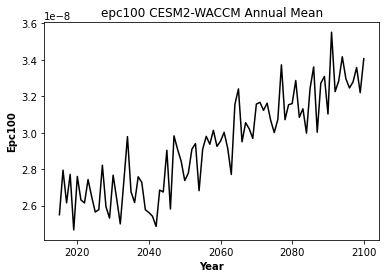

In [274]:
fig, ax = plt.subplots()

ax.plot(time, var_mean, 'k')
#ax.plot(time, yearly_summer, 'r')
#ax.plot(time, yearly_winter, 'b')

ax.title.set_text("{} {} Annual Mean".format(variable, model))

ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Epc100")
plt.xlabel("Year")

#plt.savefig("output/{}_{}_{}_projection_annual_mean.png".format(variable, model, experiment))

plt.show()

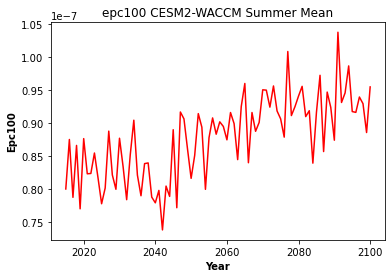

In [275]:
fig, ax = plt.subplots()

#ax.plot(time, var_mean, 'k')
ax.plot(time, yearly_summer, 'r')
#ax.plot(time, yearly_winter, 'b')

ax.title.set_text("{} {} Summer Mean".format(variable, model))

ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Epc100")
plt.xlabel("Year")

#plt.savefig("output/{}_{}_{}_projection_summer_mean.png".format(variable, model, experiment))

plt.show()

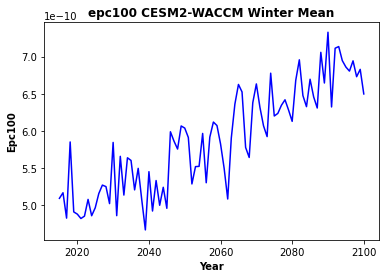

In [276]:
fig, ax = plt.subplots()

#ax.plot(time, var_mean, 'k')
#ax.plot(time, yearly_summer, 'r')
ax.plot(time, yearly_winter, 'b')

plt.title("{} {} Winter Mean".format(variable, model),fontweight="bold")

ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Epc100")
plt.xlabel("Year")

#plt.savefig("output/{}_{}_{}_projection_winter_mean.png".format(variable, model, experiment))

plt.show()

In [277]:
annual_inflection = 2034.4

annual_point = np.where(time == int(annual_inflection))[0].tolist()
annual_label = int(annual_inflection)
annual_position = (annual_label, var_mean[annual_point][0])


summer_inflection = 2052.9

summer_point = np.where(time == int(summer_inflection))[0].tolist()
summer_label = int(summer_inflection)
summer_position = (summer_label, yearly_summer[summer_point[0]])


# winter_inflection = 2052.9

# winter_point = np.where(time == int(winter_inflection))[0].tolist()
# winter_label = int(winter_inflection)
# winter_position = (winter_label, yearly_winter[winter_point[0]])

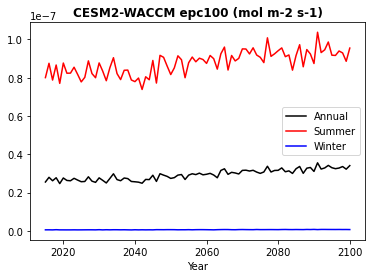

In [278]:
fig, ax = plt.subplots()

ax.plot(time, var_mean, '-k', label = "Annual")
ax.plot(time, yearly_summer, '-r', label = "Summer")
ax.plot(time, yearly_winter, '-b', label = "Winter")

# plt.annotate(annual_label, annual_position, textcoords="offset points", xytext=(0,10), ha='center') 
# plt.annotate(summer_label, summer_position, textcoords="offset points",xytext=(0,12), ha='center') 
# #plt.annotate(winter_label, winter_position, textcoords="offset points",xytext=(0,12), ha='center') 

plt.title("{} {} ({})".format(model, variable, unit), fontweight="bold")

#ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
#ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

#plt.ylabel("Epc100")
plt.xlabel("Year")

plt.legend()

plt.savefig("output/{}/{}_{}_{}_mean_projection_whole.png".format(model, variable, model, experiment))

plt.show()

### Zonal

##### Increasing zone

In [95]:
inc = xarray.open_dataset("Data/{}_{}_{}_inc.nc".format(variable, model, experiment))
inc = inc.drop_vars("spatial_ref")
inc

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
    depth    float64 ...
Data variables:
    epc100   (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Thu Aug 04 16:34:12 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /ccc/work/cont003/gencmip6/oboucher/IGCM_OUT/IPSL...
    ...                     ...
    variant_label:          r1i1p1f1
    EXPID:                  ssp585
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          c2dce418e78ca835be1e2ff817c2c403
    model_version:          6.1.8
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [96]:
inc_spatial_mean = inc.groupby("time").mean(["lat", "lon"])
inc_spatial_mean

<xarray.Dataset>
Dimensions:  (time: 1032)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
    depth    float64 100.0
Data variables:
    epc100   (time) float32 1.301e-07 1.282e-07 ... 4.926e-08 9.728e-08

In [97]:
inc_year_mean = inc_spatial_mean.groupby("time.year").mean("time")
inc_year_mean

<xarray.Dataset>
Dimensions:  (year: 86)
Coordinates:
    depth    float64 100.0
  * year     (year) int64 2015 2016 2017 2018 2019 ... 2096 2097 2098 2099 2100
Data variables:
    epc100   (year) float32 4.286e-08 4.442e-08 4.647e-08 ... 5.02e-08 5.163e-08

In [98]:
inc_mean = inc_year_mean[variable].values

In [99]:
time = inc_year_mean['year'].values

In [100]:
inc_yearly_summer = []
inc_yearly_winter = []

In [101]:
for i in time:
    year = inc_spatial_mean.sel(time = "{}".format(i))
    
    season_mean = year.groupby("time.season").mean("time")

    summer = season_mean.sel(season = "DJF")[variable].values
    summer = summer.tolist()
    winter = season_mean.sel(season = "JJA")[variable].values
    winter = winter.tolist()
    
    inc_yearly_summer.append(summer)
    inc_yearly_winter.append(winter)
    

In [102]:
data = {'Year': time,
        'Annual': inc_mean,
        'Summer': inc_yearly_summer,
        'Winter': inc_yearly_winter
        }

df = pd.DataFrame(data, columns= ['Year', 'Annual', 'Summer', 'Winter'])
df = df.assign(Model = "{}".format(model))
df

,Year,Annual,Summer,Winter,Model
0,2015,4.285769e-08,1.047445e-07,7.563147e-09,IPSL-CM6A-LR
1,2016,4.442164e-08,1.091526e-07,7.406173e-09,IPSL-CM6A-LR
2,2017,4.647353e-08,1.138622e-07,7.749789e-09,IPSL-CM6A-LR
3,2018,4.848721e-08,1.200793e-07,7.641230e-09,IPSL-CM6A-LR
4,2019,4.619483e-08,1.146644e-07,7.507531e-09,IPSL-CM6A-LR
...,...,...,...,...,...
81,2096,5.111865e-08,1.229735e-07,7.829864e-09,IPSL-CM6A-LR
82,2097,5.113717e-08,1.239879e-07,7.685638e-09,IPSL-CM6A-LR
83,2098,5.085575e-08,1.225390e-07,8.011181e-09,IPSL-CM6A-LR
84,2099,5.019895e-08,1.195268e-07,7.789430e-09,IPSL-CM6A-LR


In [103]:
df.to_csv("csv/{}_{}_inc.csv".format(model, variable), index = False, header=True)

##### Decreasing zone

In [104]:
dec = xarray.open_dataset("Data/{}_{}_{}_dec.nc".format(variable, model, experiment))
dec = dec.drop_vars("spatial_ref")
dec

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360, time: 1032)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
    depth    float64 ...
Data variables:
    epc100   (time, lat, lon) float32 ...
Attributes: (12/53)
    CDI:                    Climate Data Interface version 1.9.8 (https://mpi...
    history:                Thu Aug 04 16:34:12 2022: cdo remapdis,r360x180 -...
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    Conventions:            CF-1.7 CMIP-6.2
    name:                   /ccc/work/cont003/gencmip6/oboucher/IGCM_OUT/IPSL...
    ...                     ...
    variant_label:          r1i1p1f1
    EXPID:                  ssp585
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          c2dce418e78ca835be1e2ff817c2c403
    model_version:          6.1.8
    CDO:                    Climate Data Operators version 1.9.8 (https://mpi...

In [105]:
dec_spatial_mean = dec.groupby("time").mean(["lat", "lon"])
dec_spatial_mean

<xarray.Dataset>
Dimensions:  (time: 1032)
Coordinates:
  * time     (time) datetime64[ns] 2015-01-16T12:00:00 ... 2100-12-16T12:00:00
    depth    float64 100.0
Data variables:
    epc100   (time) float32 1.506e-07 1.297e-07 ... 6.635e-08 1.036e-07

In [106]:
dec_year_mean = dec_spatial_mean.groupby("time.year").mean("time")
dec_year_mean

<xarray.Dataset>
Dimensions:  (year: 86)
Coordinates:
    depth    float64 100.0
  * year     (year) int64 2015 2016 2017 2018 2019 ... 2096 2097 2098 2099 2100
Data variables:
    epc100   (year) float32 5.168e-08 5.23e-08 5.42e-08 ... 4.712e-08 4.913e-08

In [107]:
dec_mean = dec_year_mean[variable].values

In [108]:
dec_yearly_summer = []
dec_yearly_winter = []

In [109]:
for i in time:
    year = dec_spatial_mean.sel(time = "{}".format(i))
    
    season_mean = year.groupby("time.season").mean("time")

    summer = season_mean.sel(season = "DJF")[variable].values
    summer = summer.tolist()
    winter = season_mean.sel(season = "JJA")[variable].values
    winter = winter.tolist()
    
    dec_yearly_summer.append(summer)
    dec_yearly_winter.append(winter)
    

In [110]:
time = dec_year_mean['year'].values

In [111]:
data = {'Year': time,
        'Annual': dec_mean,
        'Summer': dec_yearly_summer,
        'Winter': dec_yearly_winter
        }

df = pd.DataFrame(data, columns= ['Year', 'Annual', 'Summer', 'Winter'])
df = df.assign(Model = "{}".format(model))
df

,Year,Annual,Summer,Winter,Model
0,2015,5.167785e-08,1.221166e-07,9.500848e-09,IPSL-CM6A-LR
1,2016,5.229992e-08,1.270893e-07,9.202374e-09,IPSL-CM6A-LR
2,2017,5.419767e-08,1.273510e-07,9.249270e-09,IPSL-CM6A-LR
3,2018,5.192076e-08,1.208217e-07,9.259648e-09,IPSL-CM6A-LR
4,2019,5.262438e-08,1.242178e-07,9.421306e-09,IPSL-CM6A-LR
...,...,...,...,...,...
81,2096,4.826642e-08,1.035716e-07,9.113737e-09,IPSL-CM6A-LR
82,2097,4.767493e-08,9.898366e-08,9.141426e-09,IPSL-CM6A-LR
83,2098,4.842247e-08,9.999770e-08,9.492612e-09,IPSL-CM6A-LR
84,2099,4.712034e-08,9.743881e-08,9.182642e-09,IPSL-CM6A-LR


In [112]:
df.to_csv("csv/{}_{}_dec.csv".format(model, variable), index = False, header=True)

##### Plotting

In [212]:
inc_inflection = 2034.4

inc_point = np.where(time == int(inc_inflection))[0].tolist()
inc_label = int(inc_inflection)
inc_position = (inc_label, inc_mean[inc_point][0])


# dec_inflection = 

# dec_point = np.where(time == int(dec_inflection))[0].tolist()
# dec_label = int(dec_inflection)
# dec_position = (dec_label, dec_mean[dec_point][0])

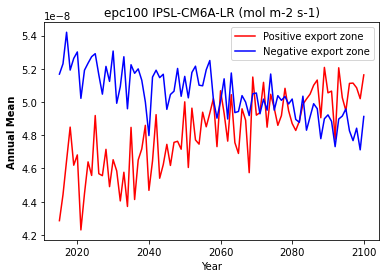

In [113]:
fig, ax = plt.subplots()


ax.plot(time, inc_mean, '-r',  label = "Positive export zone")
ax.plot(time, dec_mean, '-b', label = "Negative export zone")


#plt.annotate(inc_label, inc_position, textcoords="offset points", xytext=(0,10), ha='center') 
#plt.annotate(dec_label, dec_position, textcoords="offset points",xytext=(0,12), ha='center') 


plt.title("{} {} ({})".format(variable, model, unit))

#ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Annual Mean")
plt.xlabel("Year")

plt.legend()

plt.savefig("output/{}/{}_{}_{}_annual_projection_by_zone.png".format(model, variable, model, experiment))

plt.show()

In [216]:
inc_inflection = 2052.9

inc_point = np.where(time == int(inc_inflection))[0].tolist()
inc_label = int(inc_inflection)
inc_position = (inc_label, inc_yearly_summer[inc_point[0]])


# dec_inflection = 

# dec_point = np.where(time == int(dec_inflection))[0].tolist()
# dec_label = int(dec_inflection)
# dec_position = (dec_label, dec_yearly_summer[dec_point[0]])

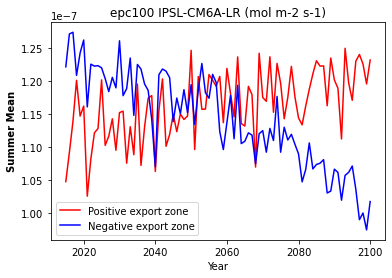

In [114]:
fig, ax = plt.subplots()


ax.plot(time, inc_yearly_summer, '-r', label = "Positive export zone")
ax.plot(time, dec_yearly_summer, '-b', label = "Negative export zone")

#plt.annotate(inc_label, inc_position, textcoords="offset points", xytext=(0,10), ha='center') 
#plt.annotate(dec_label, dec_position, textcoords="offset points",xytext=(0,12), ha='center') 


plt.title("{} {} ({})".format(variable, model, unit))

#ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Summer Mean")
plt.xlabel("Year")

plt.legend()

plt.savefig("output/{}/{}_{}_{}_summer_projection_by_zone.png".format(model, variable, model, experiment))

plt.show()

In [216]:
# inc_inflection = 2052.9

# inc_point = np.where(time == int(inc_inflection))[0].tolist()
# inc_label = int(inc_inflection)
# inc_position = (inc_label, inc_yearly_winter[inc_point[0]])


# dec_inflection = 

# dec_point = np.where(time == int(dec_inflection))[0].tolist()
# dec_label = int(dec_inflection)
# dec_position = (dec_label, dec_yearly_winter[dec_point[0]])

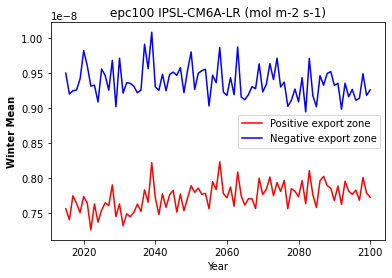

In [116]:
fig, ax = plt.subplots()


ax.plot(time, inc_yearly_winter, 'r', label = "Positive export zone")
ax.plot(time, dec_yearly_winter, 'b', label = "Negative export zone")

#plt.annotate(inc_label, inc_position, textcoords="offset points", xytext=(0,10), ha='center') 
#plt.annotate(dec_label, dec_position, textcoords="offset points",xytext=(0,12), ha='center') 


plt.title("{} {} ({})".format(variable, model, unit))

#ax.set_xlabel('xlabel', fontdict=dict(weight='bold'))
ax.set_ylabel('xlabel', fontdict=dict(weight='bold'))

plt.ylabel("Winter Mean")
plt.xlabel("Year")

plt.legend()

plt.savefig("output/{}/{}_{}_{}_winter_projection_by_zone.png".format(model, variable, model, experiment))

plt.show()